In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Load dataset (skip top metadata rows which World Bank files have)
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [3]:
# show all columns (or the final columns)
print(data.columns.tolist()[:10])   # first 10 cols
print("... total columns:", len(data.columns))
# find columns containing '2024'
[ c for c in data.columns if '2024' in str(c) ]


['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']
... total columns: 70


['2024']

In [4]:
year_col = '2024'   # change if your column name differs
df_year = data[['Country Name', year_col]].copy()
df_year.columns = ['country', 'population']
df_year = df_year.dropna(subset=['population'])
df_year['population'] = pd.to_numeric(df_year['population'], errors='coerce')
df_year = df_year.dropna(subset=['population'])
df_year.shape


(265, 2)

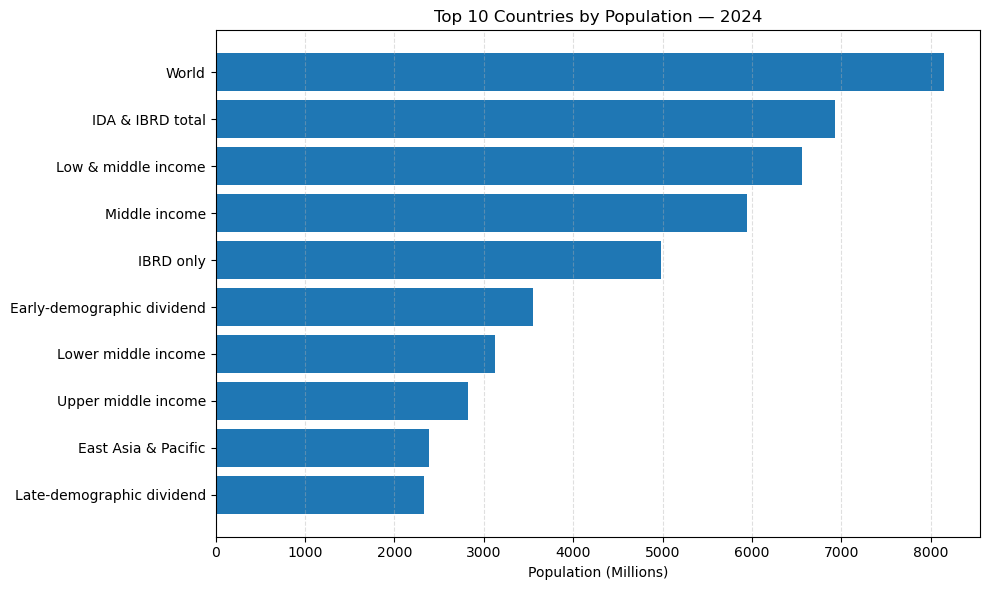

In [5]:
top10 = df_year.sort_values('population', ascending=False).head(10).iloc[::-1]

plt.figure(figsize=(10,6))
plt.barh(top10['country'], top10['population'] / 1e6)   # scale to millions
plt.xlabel('Population (Millions)')
plt.title('Top 10 Countries by Population — 2024')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("top10_population_2024.png", dpi=300, bbox_inches='tight')
plt.show()


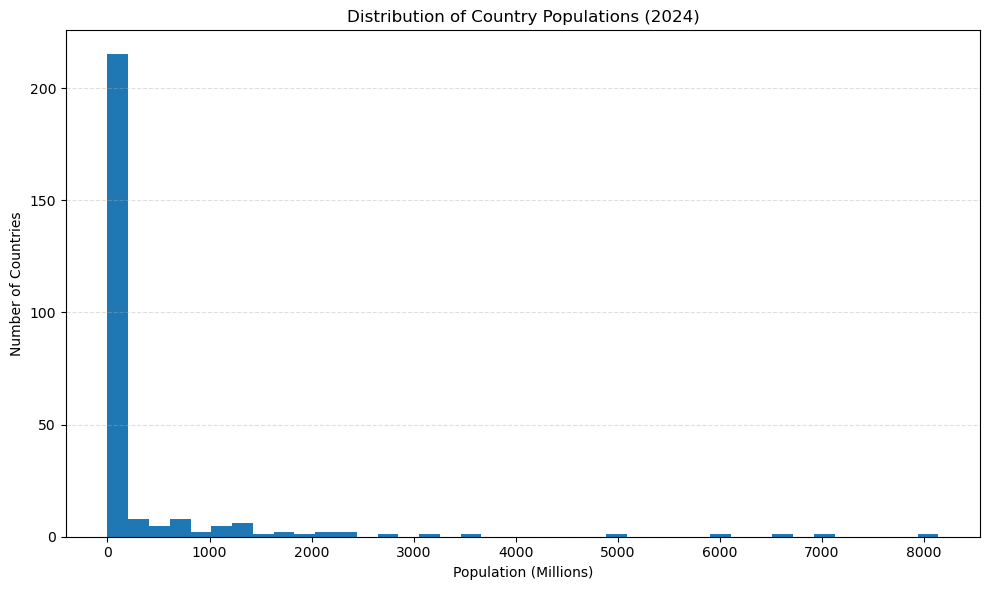

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df_year['population'] / 1e6, bins=40)
plt.xlabel('Population (Millions)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Country Populations (2024)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("population_histogram_2024.png", dpi=300, bbox_inches='tight')
plt.show()


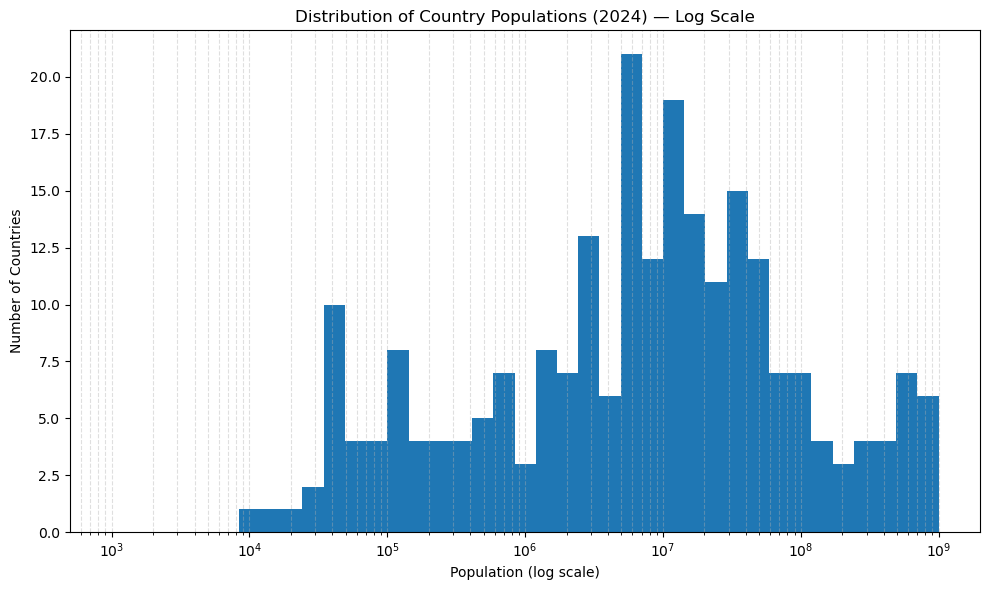

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df_year['population'], bins=np.logspace(3, 9, 40))
plt.xscale('log')
plt.xlabel('Population (log scale)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Country Populations (2024) — Log Scale')
plt.grid(which='both', axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("population_histogram_2024_log.png", dpi=300, bbox_inches='tight')
plt.show()
